In [0]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 5.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [0]:
!pip install -q findspark

In [0]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 26.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=dd9a1c09f529c5f3b57195fcf9d94fc55852d6b649009b9874c77f082709f299
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [0]:
import findspark
findspark.init()

In [0]:
#Starting a Spark Session
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName('titanic').getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#Importing needed packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib  inline 
import seaborn as sns

In [0]:
#Reading White Wine dataset

titanic_psdf = spark.read.csv("/FileStore/tables/titanic.csv", header = 'true', inferSchema = 'true')

In [0]:
titanic = titanic_psdf.toPandas()

In [0]:
type(titanic)

Out[25]: pandas.core.frame.DataFrame

In [0]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [0]:
titanic.shape

Out[27]: (891, 12)

In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int32  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(5), object(5)
memory usage: 66.3+ KB


In [0]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
titanic.dtypes

Out[31]: PassengerId      int32
Survived         int32
Pclass           int32
Name            object
Sex             object
Age            float64
SibSp            int32
Parch            int32
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
titanic.columns

Out[32]: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
titanic.isnull().sum()

Out[28]: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Out[35]: (array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

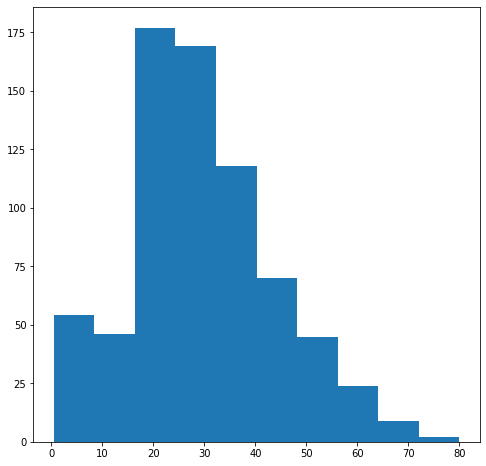

In [0]:
plt.hist(titanic['Age'])

Out[36]: <AxesSubplot:>

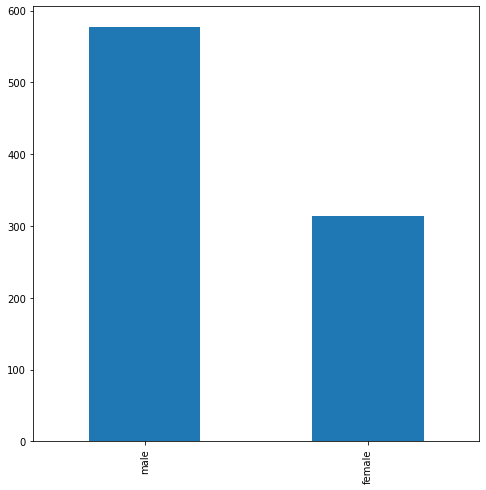

In [0]:
titanic['Sex'].value_counts().plot(kind='bar')

Out[39]: Text(0, 0.5, 'Average Age')

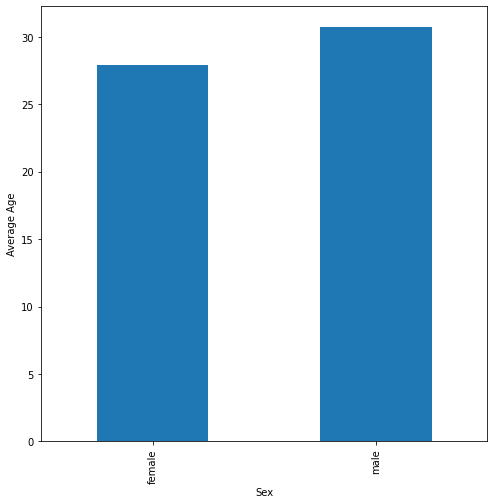

In [0]:
titanic.groupby('Sex')['Age'].mean().plot(kind='bar')
plt.ylabel('Average Age')

Out[40]: <seaborn.axisgrid.PairGrid at 0x7fa72085ffd0>

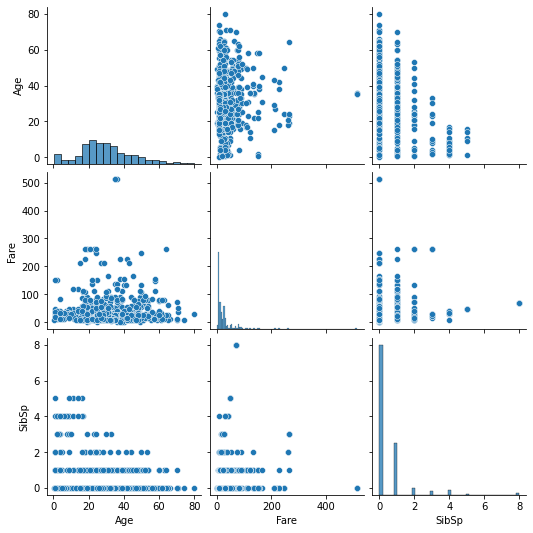

In [0]:
 sns.pairplot(titanic, vars=['Age', 'Fare', 'SibSp'])

Out[41]: Text(0, 0.5, 'Count')

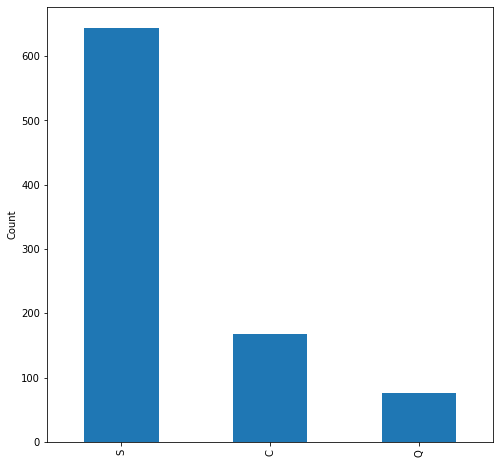

In [0]:
titanic['Embarked'].value_counts().plot(kind='bar')
plt.ylabel('Count')

Out[42]: <AxesSubplot:xlabel='Sex', ylabel='count'>

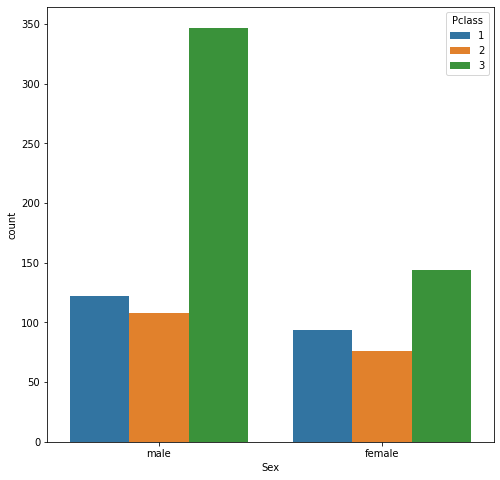

In [0]:
sns.countplot(x='Sex', hue='Pclass', data=titanic)

Out[45]: <AxesSubplot:xlabel='Sex', ylabel='Age'>

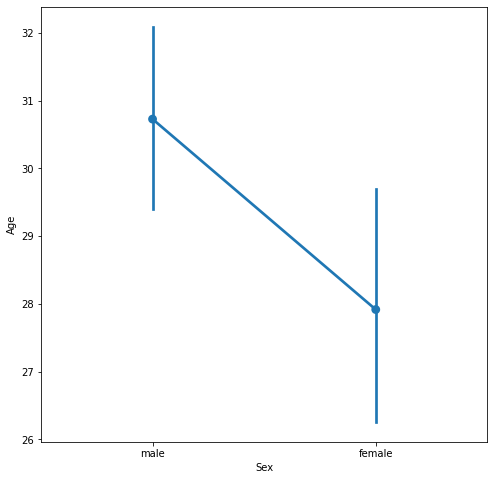

In [0]:
sns.pointplot(x='Sex', y='Age', data=titanic)

Out[44]: <AxesSubplot:xlabel='Sex', ylabel='Age'>

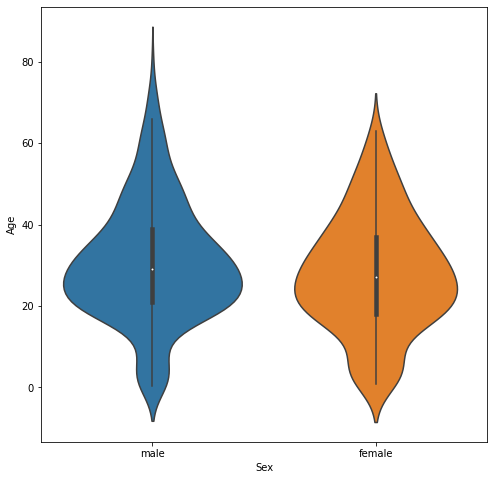

In [0]:
sns.violinplot(x='Sex', y='Age', data=titanic)

Out[46]: <AxesSubplot:xlabel='Sex', ylabel='Age'>

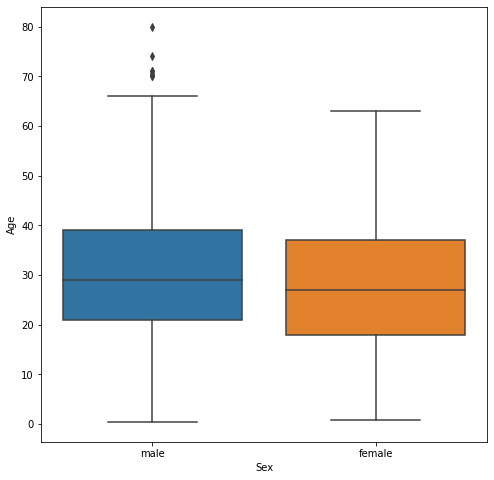

In [0]:
sns.boxplot(x='Sex', y='Age', data=titanic)

Out[47]: <AxesSubplot:xlabel='Sex', ylabel='Age'>

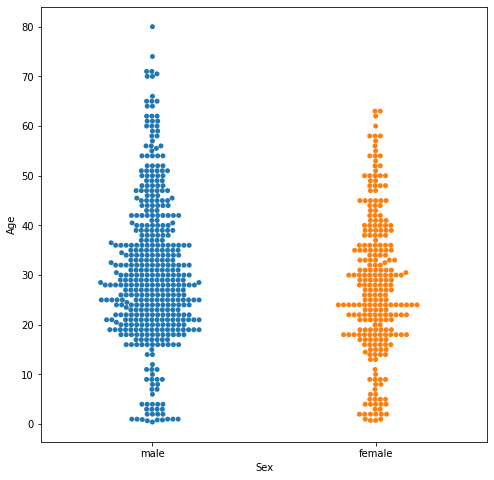

In [0]:
sns.swarmplot(x='Sex', y='Age', data=titanic)

Out[49]: <seaborn.axisgrid.FacetGrid at 0x7fa70efe36d0>

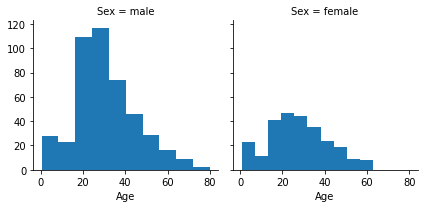

In [0]:
g = sns.FacetGrid(titanic, col='Sex')
g.map(plt.hist, 'Age')

Out[51]: <seaborn.axisgrid.FacetGrid at 0x7fa70ebaf160>

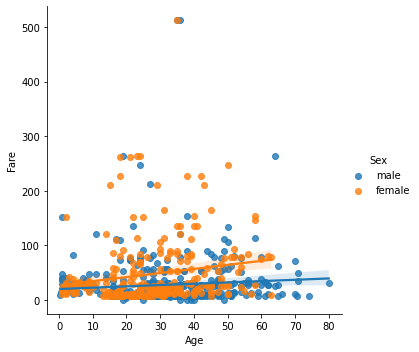

In [0]:
sns.lmplot(x= 'Age', y='Fare', hue='Sex', data=titanic)

Out[52]: <AxesSubplot:xlabel='Sex', ylabel='Age'>

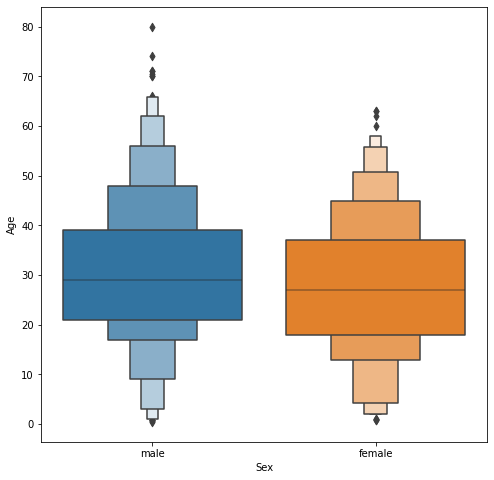

In [0]:
sns.boxenplot(x='Sex', y='Age', data=titanic)

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[53]: <AxesSubplot:xlabel='Fare', ylabel='Density'>

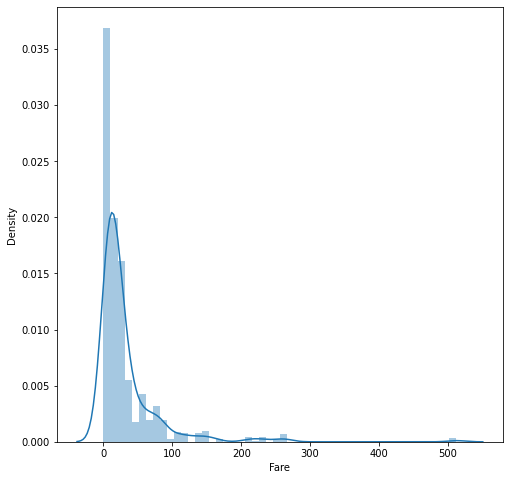

In [0]:
sns.distplot(titanic['Fare'])

Out[50]: <AxesSubplot:>

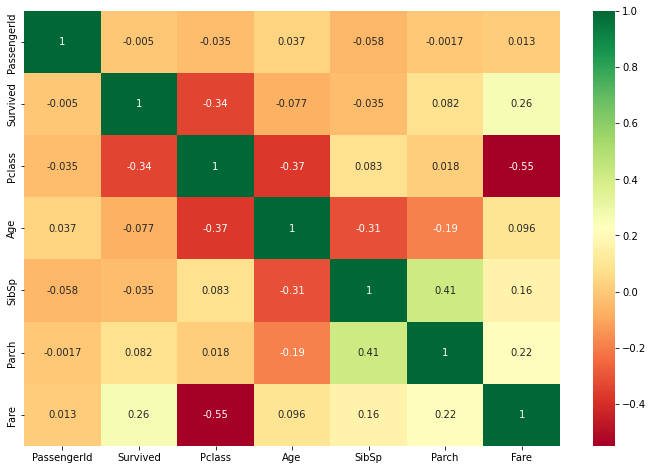

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic.corr(), cmap='RdYlGn', annot=True)